In [188]:
#!/usr/bin/env python 
import numpy as np
from scipy import constants as sp
from process_data import SetParams

class PostProcData2:
    def __init__(self):
        setp = SetParams.SetParams()
        params = setp.set_params()
        self.w = params["w"]
        self.t = params["t"]
        self.l = params["l"]
        self.pen = params["pen"]

        #define the resonator - from CST or experiment
        self.omega = params["omega"]
        self.Z = params["Z"]
            	
    def single_spin_coupling(self,Bx,By,*args,**kwargs):
        theta = kwargs.get('theta',0)
        ang = np.cos(theta)
        ue = sp.physical_constants["Bohr magneton"][0]
        g = 0.47 * ue * np.sqrt(By**2 + (ang**2) * Bx**2)
        return g/sp.h

    def spin_density(self,g):
        volume = g * self.t * self.l
        rho =  sp.m_e / volume
        return rho

In [189]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import os
from process_data import ReadComsol
import Plotting

#read in 1d data from comsol for plotting
bx = ReadComsol.ReadComsol('comsol_datafiles/Bx.csv')
by = ReadComsol.ReadComsol('comsol_datafiles/By.csv')
bn = ReadComsol.ReadComsol('comsol_datafiles/normB.csv')

xx,Bx = bx.read_1D_comsol_data()
xy,By = by.read_1D_comsol_data()
xn,Bn = bn.read_1D_comsol_data()

#centre axis about 0
xx = xx - max(xx)/2
xy = xy - max(xy)/2
xn = xn - max(xn)/2

theta = np.linspace(0,360,len(xx))

g = np.zeros((len(theta),len(xx)),dtype=float)
rho = np.zeros((len(theta),len(xx)),dtype=float)
#calcualte single spin couplinng coefficient
pp = PostProcData2()
for i in range(0,len(theta)):
    g[i] = pp.single_spin_coupling(Bx,By,theta=theta[i])
    
    rho[i] = pp.spin_density(g[i])
    rho[i] = rho[i] / sum(rho[i])

theta = np.array([theta,]*len(xx)).transpose()

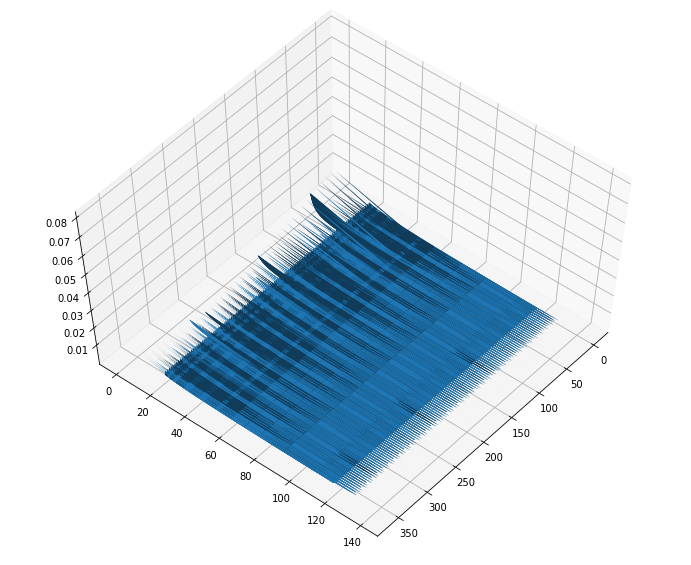

In [170]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta,g,rho)
# ax.plot_surface(theta, g, rho, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none');
# fig.colorbar(surf, shrink=1, aspect=10)
ax.view_init(60, 40)
plt.show()

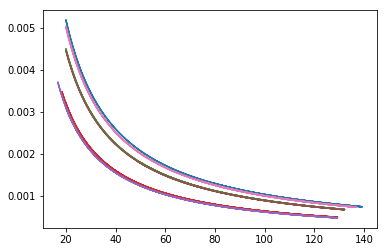

In [171]:
plt.plot(g[0],rho[0])
plt.plot(g[10],rho[10])
plt.plot(g[20],rho[20])
plt.plot(g[30],rho[30])
plt.plot(g[40],rho[40])
plt.plot(g[50],rho[50])
plt.plot(g[60],rho[60])
plt.show()

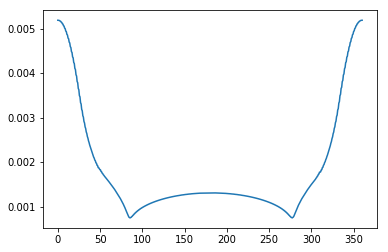

In [173]:
plt.plot(theta[:,0],rho[0])
plt.show()

In [174]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import os
from process_data import ReadComsol
import Plotting

#read in 1d data from comsol for plotting
bx = ReadComsol.ReadComsol('comsol_datafiles/Bx.csv')
by = ReadComsol.ReadComsol('comsol_datafiles/By.csv')
bn = ReadComsol.ReadComsol('comsol_datafiles/normB.csv')

xx,Bx = bx.read_1D_comsol_data()
xy,By = by.read_1D_comsol_data()
xn,Bn = bn.read_1D_comsol_data()

#centre axis about 0
xx = xx - max(xx)/2
xy = xy - max(xy)/2
xn = xn - max(xn)/2

theta = np.linspace(0,360,len(xx))

g = np.zeros((len(theta),len(xx)),dtype=float)
rho = np.zeros((len(theta),len(xx)),dtype=float)
#calcualte single spin coupling coefficient
pp = PostProcData2()
for i in range(0,len(theta)):
    g[i] = pp.single_spin_coupling(Bx[i],By[i],theta=theta[i])

for j in range(0,len(g)):
    rho[j] = pp.spin_density(g[j])
    rho[j] = rho[j] / sum(rho[j])

#theta = np.array([theta,]*len(xx)).transpose()

In [175]:
max(g[0] - g[4])

-0.074826348254678265

In [176]:
max(rho[0] - rho[1])

1.3227266504323154e-17

In [177]:
np.shape(g)

(536, 536)

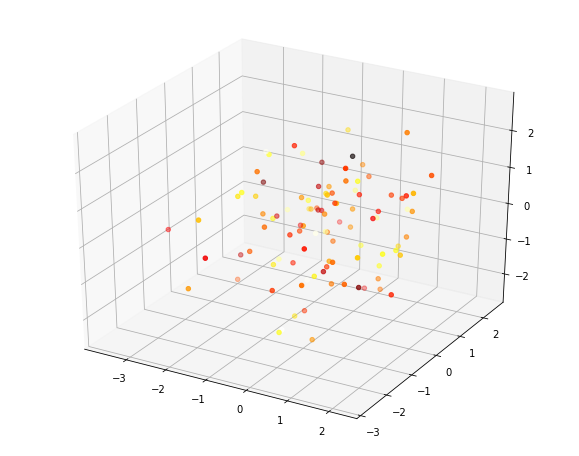

In [179]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
c = np.random.standard_normal(100)

ax.scatter(x, y, z, c=c, cmap=plt.hot())
plt.show()

In [191]:
ax.scatter(xx, theta[:,0])
plt.show()